<a href="https://colab.research.google.com/github/Supriya090/2021-naamii-rl-practical/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer Vison Libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vison here
* `torchvision.models` - get pretrained computer vison models
* `torchvision.transforms` - functions for manipulating your vison data to be suitable to use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting a Dataset

The dataset we will be using is fashionMNIST from `torchvision.datasets`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True, # do we want the training dataset?
    download = True, # do we want to download it?
    transform = ToTensor(), # how do we want to transform data?
    target_transform = None # how do we want to transform labels?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26421880/26421880 [00:02<00:00, 10464606.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 176014.02it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3254800.50it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22421886.80it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training examples
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our image
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

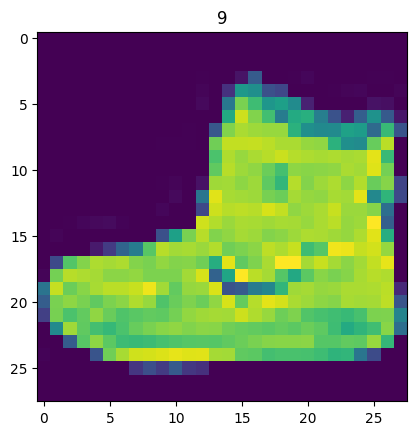

In [8]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

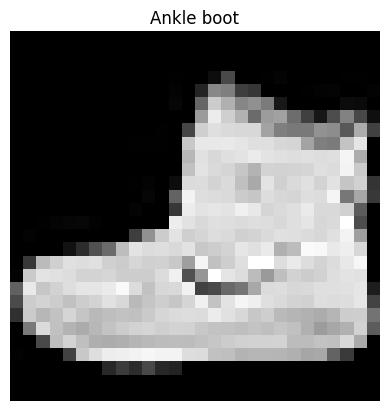

In [9]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False)

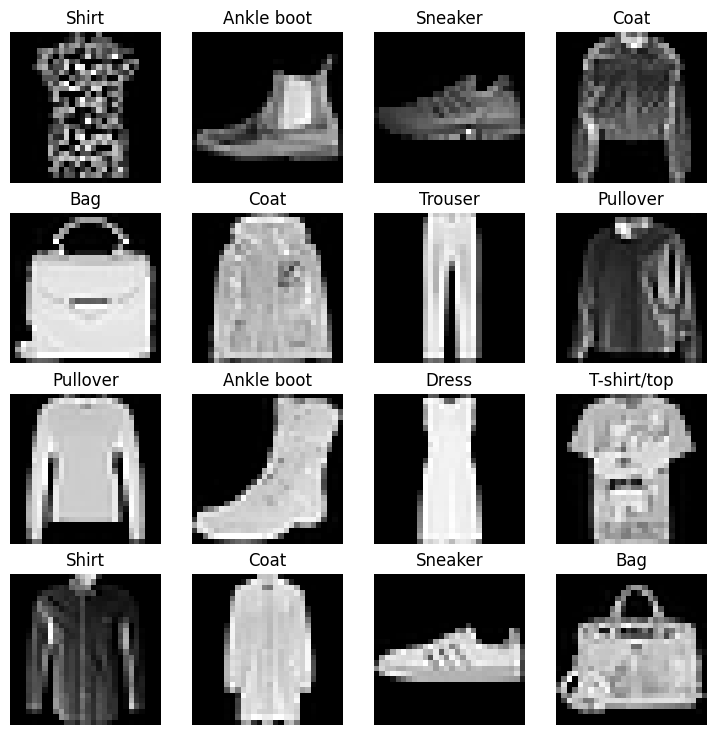

In [10]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare Dataloader

Right now, our data is in the form of Python Datasets

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

But why?

1. More computationally efficient, to make it batch size 32
2. It gives our neural network more chance to update its gradient per epoch

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparemeter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79d2a7037730>,
 <torch.utils.data.dataloader.DataLoader at 0x79d2a70379a0>)

In [12]:
# Let's checkout what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79d2a7037730>, <torch.utils.data.dataloader.DataLoader object at 0x79d2a70379a0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [13]:
# Check out what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label:6, label size: torch.Size([])


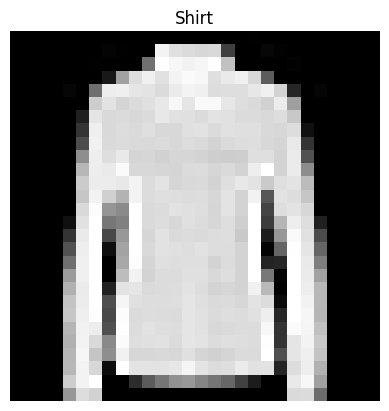

In [14]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label:{label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When building a series of ML modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you try and improve upon with subsequent models/experiments.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [16]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                       out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                       out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28*28
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup Loss Optimizers and evaluation metrics

* Loss Function - for multiclass data, we use `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - using accuracy since it is a classification problem

In [20]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [21]:
# Import accuracy
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments

Need to track
1. Model's performance (loss and accuracy values)
2. How fast it runs?

In [22]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time """
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [23]:
start_time = timer()
# SOME CODE
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu:  0.000 seconds


2.881300000012743e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, performing testing steps, calculate test loss per batch
4. Print through what's happening
5. Time it all

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs(keeping this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ### Training
  train_loss = 0

  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testing Loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print what's happening
  print(f"\nTrain Loss: {train_loss: .4f} | Test Loss: {test_loss: .4f}, Test Acc: {test_acc:.2f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device)
                                            )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.5904 | Test Loss:  0.5095, Test Acc: 82.04
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.4763 | Test Loss:  0.4799, Test Acc: 83.20
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.4550 | Test Loss:  0.4766, Test Acc: 83.43
Train time on cpu:  27.663 seconds


## 4. Make Predictions and get Model 0 results

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy value per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

      # Scale the loss and acc to find average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model= model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model is non-linearity

In [63]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flattens inputs into a single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features = hidden_unit,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [64]:
next(model_0.parameters()).device

device(type='cpu')

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape = 784,  # 28*28
    hidden_unit = 8,
    output_shape = len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [66]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Creating a loss function and optimizer

In [67]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(),  # tries to update our model parameters to reduce loss
                            lr = 0.1)

### 6.2 Making a function for our training and testing loop

* training loop - `train_step()`
* testing loop - `test_step()`

In [68]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """ Performs training step with model trying to learn on data_loader."""
  ### Training
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Adding a loop to loop through traiing batches
  for batch, (X, y) in enumerate(dataloader):

    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits)
    y_pred = model(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))  # goes from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # # Print out what's happening
    # if batch%400 == 0:
    #   print(f"Looked at {batch*len(X)}/{len(dataloader.dataset)} samples.")

  # Divide the total train loss and accuracy
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc: .2f} %")


In [71]:
def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  ### Testing
  test_loss, test_acc = 0, 0

  # Putting model in eval mode
  model.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # Send data to target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward Pass
      test_pred = model(X_test)

      # 2. Calculate Loss
      loss = loss_fn(test_pred, y_test)
      test_loss += loss
      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_pred.argmax(dim = 1))
    # Divide the total train loss and accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_loss: .2f} %")

In [72]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn= accuracy_fn,
             device = device)

  test_step(model = model_1,
            test_dataloader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.60858 | Train Acc:  78.04 %
Test Loss: 0.49159 | Test Acc:  0.49 %
Epoch: 1
--------
Train Loss: 0.46915 | Train Acc:  83.40 %
Test Loss: 0.48745 | Test Acc:  0.49 %
Epoch: 2
--------
Train Loss: 0.45132 | Train Acc:  83.88 %
Test Loss: 0.49274 | Test Acc:  0.49 %
Train time on cuda:  28.412 seconds
